<a href="https://colab.research.google.com/github/jyryu3161/bio_system_design/blob/main/cobrapy_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cobra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.1/753.1 kB 48.5 MB/s eta 0:00:00


# Loading a model and inspecting it

In [2]:
import cobra
from cobra.io import load_model

# "iJO1366" and "salmonella" are also valid arguments
model = load_model("textbook")

In [6]:
model

Name,e_coli_core
Memory address,7d049f226090
Number of metabolites,72
Number of reactions,95
Number of genes,137
Number of groups,0
Objective expression,1.0*Biomass_Ecoli_core - 1.0*Biomass_Ecoli_core_reverse_2cdba
Compartments,"cytosol, extracellular"


In [3]:
print(len(model.reactions))
print(len(model.metabolites))
print(len(model.genes))

95
72
137


In [12]:
for each_reaction in model.reactions:
    print(each_reaction.id)
    print(each_reaction.name)
    print(each_reaction.lower_bound)
    print(each_reaction.upper_bound)
    print(each_reaction.get_compartments)
    print(each_reaction.gene_reaction_rule)
    print(each_reaction.reaction)
    print(each_reaction.reactants)
    print(each_reaction.products)
    print(dir(each_reaction))
    break



ACALD
acetaldehyde dehydrogenase (acetylating)
-1000.0
1000.0
<bound method Reaction.get_compartments of <Reaction ACALD at 0x7d045c8c9be0>>
b0351 or b1241
acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c
[<Metabolite acald_c at 0x7d045ca80740>, <Metabolite coa_c at 0x7d045ca82390>, <Metabolite nad_c at 0x7d045c8fc5c0>]
[<Metabolite accoa_c at 0x7d045ca80ce0>, <Metabolite h_c at 0x7d045ca97aa0>, <Metabolite nadh_c at 0x7d045c8fcaa0>]
['__add__', '__class__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__isub__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '_annotation', '_associate_gene', '_check_bounds', '_dissociate_gene', '_g

In [14]:
model.reactions[0]


Reaction identifier,ACALD
Name,acetaldehyde dehydrogenase (acetylating)
Memory address,0x7d045c8c9be0
Stoichiometry,acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c Acetaldehyde + Coenzyme A + Nicotinamide adenine dinucleotide <=> Acetyl-CoA + H+ + Nicotinamide adenine dinucleotide - reduced
GPR,b0351 or b1241
Lower bound,-1000.0
Upper bound,1000.0


In [15]:
print(model.reactions.EX_glc__D_e.bounds)

(-10.0, 1000.0)


# Reactions

In [16]:
pgi = model.reactions.get_by_id("PGI")
pgi

Reaction identifier,PGI
Name,glucose-6-phosphate isomerase
Memory address,0x7d045c9a9580
Stoichiometry,g6p_c <=> f6p_c D-Glucose 6-phosphate <=> D-Fructose 6-phosphate
GPR,b4025
Lower bound,-1000.0
Upper bound,1000.0


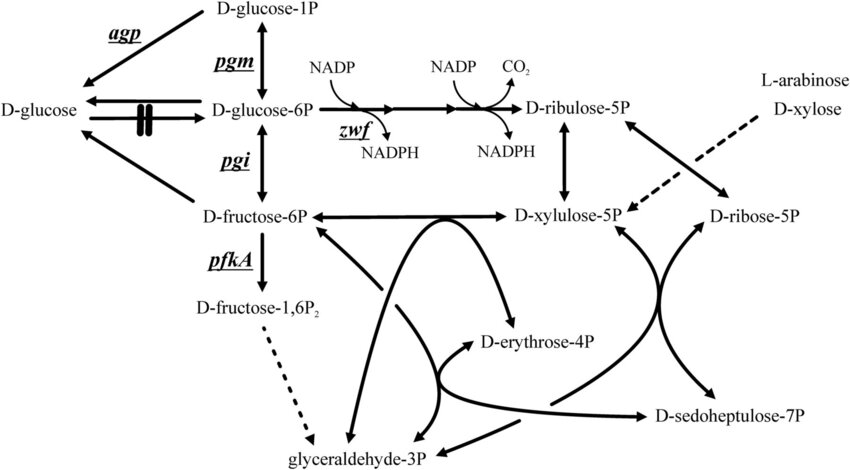

In [17]:
print(pgi.name)
print(pgi.reaction)

glucose-6-phosphate isomerase
g6p_c <=> f6p_c


In [23]:
old_bounds = pgi.bounds
pgi.bounds = (0, 1000.0)
print(pgi.lower_bound, "< pgi <", pgi.upper_bound)
print("Reversibility after modification:", pgi.reversibility)
pgi.bounds = old_bounds
print("Reversibility after resetting:", pgi.reversibility)

0 < pgi < 1000.0
Reversibility after modification: False
Reversibility after resetting: True


In [24]:
print(pgi.check_mass_balance())

print("metabolite 추가")
pgi.add_metabolites({model.metabolites.get_by_id("h_c"): -1})
print(pgi.reaction)

print(pgi.check_mass_balance())

print("metabolite 제거")
pgi.subtract_metabolites({model.metabolites.get_by_id("h_c"): -1})
print(pgi.reaction)
print(pgi.check_mass_balance())


{'charge': -1.0, 'H': -1.0}
metabolite 추가
g6p_c + 2 h_c <=> f6p_c
{'charge': -2.0, 'H': -2.0}
metabolite 제거
g6p_c + h_c <=> f6p_c
{'charge': -1.0, 'H': -1.0}


# Metabolites

In [25]:
atp = model.metabolites.get_by_id("atp_c")
atp

Metabolite identifier,atp_c
Name,ATP
Memory address,0x7d045ca816d0
Formula,C10H12N5O13P3
Compartment,c
In 13 reaction(s),"GLNS, PPCK, PFK, ATPS4r, PPS, GLNabc, SUCOAS, PGK, ADK1, Biomass_Ecoli_core, ACKr, ATPM, PYK"


In [26]:
model.solver

In [28]:
print(dir(model))
print(model.objective)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_annotation', '_compartments', '_contexts', '_id', '_populate_solver', '_repr_html_', '_sbml', '_set_id_with_model', '_solver', '_tolerance', 'add_boundary', 'add_cons_vars', 'add_groups', 'add_metabolites', 'add_reactions', 'annotation', 'boundary', 'compartments', 'constraints', 'copy', 'demands', 'exchanges', 'genes', 'get_associated_groups', 'groups', 'id', 'medium', 'merge', 'metabolites', 'name', 'notes', 'objective', 'objective_direction', 'optimize', 'problem', 'reactions', 'remove_cons_vars', 'remove_groups', 'remove_metabolites', 'remove_reactions', 'repair', 'sinks', 'slim_optimi

# Simulating with FBA

In [29]:
import cobra
from cobra.io import load_model

# "iJO1366" and "salmonella" are also valid arguments
model = load_model("textbook")



## Running FBA

In [30]:
solution = model.optimize()
print(solution)

<Solution 0.874 at 0x7d045620abd0>


In [34]:
print(solution.objective_value)

0.8739215069684279


In [33]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,4.765,0,0.00%
o2_e,EX_o2_e,21.8,0,0.00%
pi_e,EX_pi_e,3.215,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-22.81,1,100.00%
h2o_e,EX_h2o_e,-29.18,0,0.00%
h_e,EX_h_e,-17.53,0,0.00%


In [35]:
model.metabolites.nadh_c.summary()


Percent,Flux,Reaction,Definition
13.14%,5.064,AKGDH,akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
8.04%,3.1,Biomass_Ecoli_core,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
41.58%,16.02,GAPD,g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
13.14%,5.064,MDH,mal__L_c + nad_c <=> h_c + nadh_c + oaa_c
24.09%,9.283,PDH,coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
Percent,Flux,Reaction,Definition
100.00%,-38.53,NADH16,4.0 h_c + nadh_c + q8_c --> 3.0 h_e + nad_c + q8h2_c


## Changing the Objectives


In [36]:
biomass_rxn = model.reactions.get_by_id("Biomass_Ecoli_core")


In [38]:
from cobra.util.solver import linear_reaction_coefficients
linear_reaction_coefficients(model)

{<Reaction Biomass_Ecoli_core at 0x7d04575bfd70>: 1.0}

In [39]:
# change the objective to ATPM
model.objective = "ATPM"

# The upper bound should be 1000, so that we get
# the actual optimal value
model.reactions.get_by_id("ATPM").upper_bound = 1000.
linear_reaction_coefficients(model)

{<Reaction ATPM at 0x7d0456a024e0>: 1.0}

In [40]:
model.optimize().objective_value


175.00000000000006

## Running FVA (flux variability analysis)

In [44]:
from cobra.flux_analysis import flux_variability_analysis
flux_variability_analysis(model, model.reactions[:10])


,minimum,maximum
ACALD,7.851428e-15,0.0
ACALDt,1.203102e-13,0.0
ACKr,-2.806681e-14,0.0
ACONTa,2.000000e+01,20.0
ACONTb,2.000000e+01,20.0
ACt2r,-1.581891e-14,0.0
ADK1,0.000000e+00,0.0
AKGDH,2.000000e+01,20.0
AKGt2r,-6.629745e-15,0.0
ALCD2x,4.997107e-15,0.0


In [45]:
model.optimize()
model.summary(fva=0.95)

Metabolite,Reaction,Flux,Range,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,[9.5; 10],6,100.00%
o2_e,EX_o2_e,60,[55.88; 60],0,0.00%
Metabolite,Reaction,Flux,Range,C-Number,C-Flux
ac_e,EX_ac_e,0,[-2.059; 0],2,0.00%
acald_e,EX_acald_e,0,[-1.346; 0],2,0.00%
akg_e,EX_akg_e,0,[-0.7447; 0],5,0.00%
co2_e,EX_co2_e,-60,[-60; -54.17],1,100.00%
etoh_e,EX_etoh_e,0,[-1.167; 0],2,0.00%
for_e,EX_for_e,0,[-5.833; 0],1,0.00%
glu__L_e,EX_glu__L_e,0,[-0.6731; 0],5,0.00%


## Running pFBA

In [46]:
model.objective = 'Biomass_Ecoli_core'
fba_solution = model.optimize()
pfba_solution = cobra.flux_analysis.pfba(model)

In [47]:
abs(fba_solution.fluxes["Biomass_Ecoli_core"] - pfba_solution.fluxes[
    "Biomass_Ecoli_core"])

np.float64(3.6637359812630166e-15)

# Simulating Deletions

In [48]:
import pandas
from time import time

from cobra.io import load_model
from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)

cobra_model = load_model("textbook")
ecoli_model = load_model("iJO1366")



## Knocking out single genes and reactions

In [49]:
print('complete model: ', cobra_model.optimize())
with cobra_model:
    cobra_model.reactions.PFK.knock_out()
    print('pfk knocked out: ', cobra_model.optimize())




complete model:  <Solution 0.874 at 0x7d0452f3a5d0>
pfk knocked out:  <Solution 0.704 at 0x7d0452f3a6f0>


In [50]:
print('complete model: ', cobra_model.optimize())
with cobra_model:
    cobra_model.genes.b1723.knock_out()
    print('pfkA knocked out: ', cobra_model.optimize())
    cobra_model.genes.b3916.knock_out()
    print('pfkB knocked out: ', cobra_model.optimize())

complete model:  <Solution 0.874 at 0x7d0452d68380>
pfkA knocked out:  <Solution 0.874 at 0x7d0452d68170>
pfkB knocked out:  <Solution 0.704 at 0x7d0452d68890>


## MOMA

In [71]:
from cobra.io import load_model
from cobra.flux_analysis.moma import moma
from cobra.flux_analysis.room import room  # ROOM도 같이 예시

# 1) WT 모델과 WT FBA 해 구하기
model = load_model("textbook")
wt_solution = model.optimize()           # <- 참조 flux (Solution)

# 2) KO 모델 만들기
ko_model = model.copy()
ko_model.genes.get_by_id("b0351").knock_out()

# 3) MOMA (변이 모델 vs WT flux 참조)
#    QP 솔버가 없으면 linear=True로 선형화 버전 사용
sol_moma = moma(ko_model, wt_solution, linear=True)          # 기본: quadratic MOMA
# sol_moma = moma(ko_model, wt_solution, linear=True)  # QP 솔버 없을 때
print("MOMA growth:", sol_moma.objective_value)

print(sol_moma.fluxes)


MOMA growth: 0.0
ACALD     0.000000
ACALDt    0.000000
ACKr      0.000000
ACONTa    6.007250
ACONTb    6.007250
            ...   
TALA      1.496984
THD2      0.000000
TKT1      1.496984
TKT2      1.181498
TPI       7.477382
Name: fluxes, Length: 95, dtype: float64


## ROOM

In [72]:
from cobra.io import load_model
from cobra.flux_analysis.moma import moma
from cobra.flux_analysis.room import room  # ROOM도 같이 예시

# 1) WT 모델과 WT FBA 해 구하기
model = load_model("textbook")
wt_solution = model.optimize()           # <- 참조 flux (Solution)

# 2) KO 모델 만들기
ko_model = model.copy()
ko_model.genes.get_by_id("b0351").knock_out()

# 4) ROOM (역시 WT flux를 참조로 사용)
sol_room = room(ko_model, wt_solution, delta=1e-6, epsilon=1e-6)
print("ROOM growth:", sol_room.objective_value)
print(sol_room.fluxes)



ROOM growth: 0.0
ACALD    -1.000000e-06
ACALDt   -1.000000e-06
ACKr      0.000000e+00
ACONTa    6.007249e+00
ACONTb    6.007249e+00
              ...     
TALA      1.496984e+00
THD2      0.000000e+00
TKT1      1.496984e+00
TKT2      1.181498e+00
TPI       7.477382e+00
Name: fluxes, Length: 95, dtype: float64


## Single Deletions

In [52]:
deletion_results = single_gene_deletion(cobra_model)
deletion_results

,ids,growth,status
0,{b3870},0.873922,optimal
1,{b3737},0.374230,optimal
2,{b4154},0.873922,optimal
3,{b1101},0.873922,optimal
4,{b3919},0.704037,optimal
...,...,...,...
132,{b2935},0.873922,optimal
133,{b1611},0.873922,optimal
134,{b1241},0.873922,optimal
135,{b3732},0.374230,optimal


In [53]:
single_gene_deletion(cobra_model, cobra_model.genes[:20])


,ids,growth,status
0,{b3736},0.374230,optimal
1,{b3115},0.873922,optimal
2,{b0356},0.873922,optimal
3,{b3733},0.374230,optimal
4,{b1478},0.873922,optimal
5,{b2296},0.873922,optimal
6,{b1276},0.873922,optimal
7,{b0118},0.873922,optimal
8,{s0001},0.211141,optimal
9,{b3734},0.374230,optimal


In [76]:
single_reaction_deletion(cobra_model, cobra_model.reactions[:20])



,ids,growth,status
0,{ALCD2x},8.739215e-01,optimal
1,{ACONTa},-5.652655e-15,optimal
2,{AKGDH},8.583074e-01,optimal
3,{ATPM},9.166475e-01,optimal
4,{CO2t},4.616696e-01,optimal
5,{ETOHt2r},8.739215e-01,optimal
6,{ACONTb},-5.395887e-16,optimal
7,{ADK1},8.739215e-01,optimal
8,{ATPS4r},3.742299e-01,optimal
9,{EX_ac_e},8.739215e-01,optimal


## Double Deletions

In [77]:
single_reaction_deletion(cobra_model, cobra_model.reactions[:20], method='moma')

RuntimeError: Cannot use MOMA since 'glpk' is not QP-capable. Please choose a different solver or use FBA only.

In [55]:
double_gene_deletion(
    cobra_model, cobra_model.genes[-5:]).round(4)

,ids,growth,status
0,"{b2465, b2935}",0.0000,optimal
1,"{b2465, b0008}",0.8739,optimal
2,{b2935},0.8739,optimal
3,{b3919},0.7040,optimal
4,"{b2465, b2464}",0.8739,optimal
5,"{b3919, b2935}",0.7040,optimal
6,{b2464},0.8739,optimal
7,{b2465},0.8739,optimal
8,"{b3919, b2464}",0.7040,optimal
9,"{b3919, b0008}",0.7040,optimal


In [56]:
double_reaction_deletion(
    cobra_model, cobra_model.reactions[2:7]).round(4)

,ids,growth,status
0,"{ACt2r, ACKr}",0.8739,optimal
1,"{ACt2r, ACONTb}",-0.0000,optimal
2,{ACONTa},-0.0000,optimal
3,"{ACt2r, ADK1}",0.8739,optimal
4,{ACt2r},0.8739,optimal
5,"{ACONTb, ACONTa}",0.0000,optimal
6,"{ACONTa, ADK1}",-0.0000,optimal
7,"{ACONTb, ADK1}",-0.0000,optimal
8,{ACONTb},-0.0000,optimal
9,"{ACt2r, ACONTa}",-0.0000,optimal
